In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

We check if we have all the datasets in the directory

In [6]:
import pandas as pd
import numpy as np

In [7]:
survey_df=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [9]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that short codes for questions are used as column names.

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText, so we can load it as Pandas Series with Column as the index and the QuestionText as the value.

In [10]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column')

In [11]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [12]:
schema_raw=pd.read_csv(schema_fname,index_col='Column').QuestionText

In [13]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [14]:
schema_raw['YearsCode']

'Including any education, how many years have you been coding in total?'

In [15]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

Demographics of the survey respondents & the global programming community
Distribution of programming skills, experience and preferences
Employment-related information, preferences & opinions
Let's select a subset of columns with the relevant data for our analysis.

In [16]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [17]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'NEWEdImpt',
    'JobFactors',
    'NEWOvertime'
]

In [18]:
len(selected_columns)

20

In [19]:
schema_raw['Country']

'Where do you live?'

In [20]:
schema_raw['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [21]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [22]:
schema_raw['Hobbyist']

'Do you code as a hobby?'

Let's extract a copy of the data from these columns into a new data frame survey_copy_df, which we can continue to modify further without affecting the original data frame.

In [23]:
survey_copy_df=survey_df[selected_columns ].copy()

In [24]:
survey_copy_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,NEWEdImpt,JobFactors,NEWOvertime
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,Fairly important,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,Fairly important,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Not at all important/not necessary,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,Very important,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,Very important,NaN,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
schema=schema_raw[selected_columns].copy()

In [26]:
survey_copy_df.shape

(64461, 20)

In [27]:
schema.shape

(20,)

In [28]:
survey_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
Country                   64072 non-null object
Age                       45446 non-null float64
Gender                    50557 non-null object
EdLevel                   57431 non-null object
UndergradMajor            50995 non-null object
Hobbyist                  64416 non-null object
Age1stCode                57900 non-null object
YearsCode                 57684 non-null object
YearsCodePro              46349 non-null object
LanguageWorkedWith        57378 non-null object
LanguageDesireNextYear    54113 non-null object
NEWLearn                  56156 non-null object
NEWStuck                  54983 non-null object
Employment                63854 non-null object
DevType                   49370 non-null object
WorkWeekHrs               41151 non-null float64
JobSat                    45194 non-null object
NEWEdImpt                 48465 non-null object
JobFactors               

Most columns have the data type object, either because they contain values of different types, or they contain empty values, which are represented using NaN. It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though there are a few other columns which have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types, while ignoring any non-numeric value (they will get converted to NaNs)

If we could check then only the 'Age' and 'Workweekhours' has numeric datatype so to do some numeric computations and to plot any graphs we could use the numeric datatypes 

In [29]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [30]:
survey_copy_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [31]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [32]:
survey_copy_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [33]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [34]:
survey_copy_df.YearsCodePro.unique() #As we find that some answers to be in string type so we need to convert it into numeric type for analysis

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [35]:
survey_copy_df['Age1stCode']=pd.to_numeric(survey_copy_df.Age1stCode,errors='coerce')
survey_copy_df['YearsCode']=pd.to_numeric(survey_copy_df.YearsCode,errors='coerce')
survey_copy_df['YearsCodePro']=pd.to_numeric(survey_copy_df.YearsCodePro,errors='coerce')

In [36]:
survey_copy_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,45446.0,30.834111,9.585392,1.0,24.0,29.0,35.0,279.0
Age1stCode,57473.0,15.476572,5.114081,5.0,12.0,15.0,18.0,85.0
YearsCode,56784.0,12.782051,9.490657,1.0,6.0,10.0,17.0,50.0
YearsCodePro,44133.0,8.869667,7.759961,1.0,3.0,6.0,12.0,50.0
WorkWeekHrs,41151.0,40.782174,17.816383,1.0,40.0,40.0,44.0,475.0


There seems to be a problem with the Age column, as the minimum value is 1 and max value is 279. This is a common issues with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be ignore the rows where the value in the age column is higher than 100 years or lower than 10 years as invalid survey responses. This can be done using the .drop method, as explained here.

In [37]:
survey_copy_df.drop(survey_copy_df[survey_copy_df.Age < 10].index,inplace=True)
survey_copy_df.drop(survey_copy_df[survey_copy_df.Age > 100].index,inplace=True)

The same hold true for WorkWeekHrs. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [38]:
survey_copy_df.drop(survey_copy_df[survey_copy_df.WorkWeekHrs < 140].index,inplace=True)

In [40]:
survey_copy_df['Gender'].value_counts()

Man                                                            11586
Woman                                                           1123
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

The gender column also allows picking multiple options, but to simplify our analysis, we'll remove values containing more than option.

In [41]:
import numpy as np

In [42]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)##here we chnage the ; with Nan values

We've now cleaned up and prepared the dataset for analysis. Let's take a look at sample of rows from the data frame.

In [43]:
survey_copy_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,NEWEdImpt,JobFactors,NEWOvertime
4088,United States,59.0,Man,Some college/university study without earning ...,Mathematics or statistics,Yes,10.0,49.0,29.0,Assembly;Bash/Shell/PowerShell;C;C++;Haskell;H...,Go;HTML/CSS;JavaScript;Perl;Python;R;Rust;SQL,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, back-end;Developer, full-stack;Deve...",NaN,Very satisfied,Somewhat important,NaN,Occasionally: 1-2 days per quarter but less th...
10710,India,70.0,Man,I never completed any formal education,NaN,No,6.0,NaN,NaN,VBA,NaN,Once a decade,Play games,Employed full-time,Academic researcher,NaN,Very satisfied,NaN,NaN,Never
50936,Brazil,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
39846,Brazil,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
63358,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
59955,India,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,15.0,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;Python,Python;VBA,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst,NaN,Slightly dissatisfied,Very important,NaN,NaN
50295,Netherlands,20.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,15.0,5.0,NaN,C;C++;HTML/CSS;Java;PHP;R,C;C++;Java;R,Once a year,Visit Stack Overflow;Panic,Student,NaN,NaN,NaN,NaN,Industry that I’d be working in;Office environ...,NaN
20094,Peru,18.0,Woman,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,3.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript,C;Java;JavaScript;Kotlin;Perl;PHP;Python;Ruby;...,Every few months,Meditate;Play games;Call a coworker or friend;...,"Not employed, but looking for work","Developer, front-end",NaN,NaN,Somewhat important,NaN,NaN
46467,Ukraine,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
51507,Canada,NaN,Man,I never completed any formal education,NaN,Yes,17.0,3.0,NaN,Python;Rust,C;C++;Python;Rust,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,"Not employed, but looking for work",Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,Industry that I’d be working in;Financial perf...,NaN


In [47]:
survey_copy_df['Gender'].value_counts()

Man                                                            11586
Woman                                                           1123
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

# Exploratory Analysis and Visualization

In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country
Let's look at the number of countries from which there are responses in the survey, and plot the 10 countries with the highest number of responses.

In [49]:
schema.Country

'Where do you live?'

In [50]:
survey_copy_df.Country.nunique()

177

In [51]:
Top_countries_df=survey_copy_df.Country.value_counts().head(15)

In [52]:
Top_countries_df

India                 4380
United States         3376
Germany               1193
United Kingdom         981
Canada                 693
France                 621
Brazil                 553
Pakistan               410
Netherlands            407
Nigeria                399
Poland                 375
Bangladesh             370
Russian Federation     355
Italy                  338
Turkey                 327
Name: Country, dtype: int64

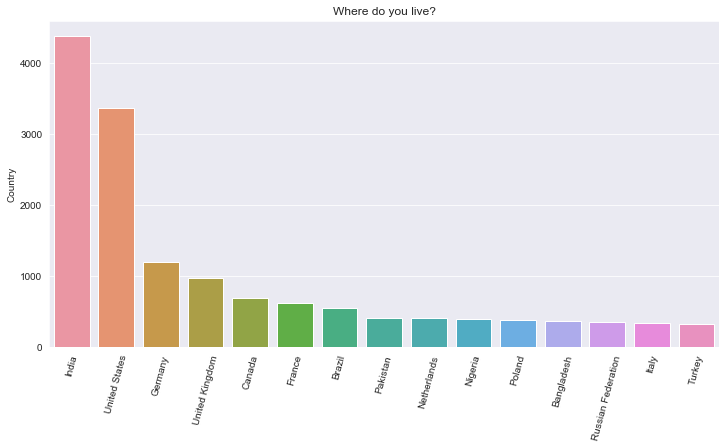

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(Top_countries_df.index, Top_countries_df);

These are list of countries which shows the top countries with responses

In [54]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [56]:
survey_copy_df.Age

1         NaN
2         NaN
4        31.0
5         NaN
6         NaN
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 23457, dtype: float64

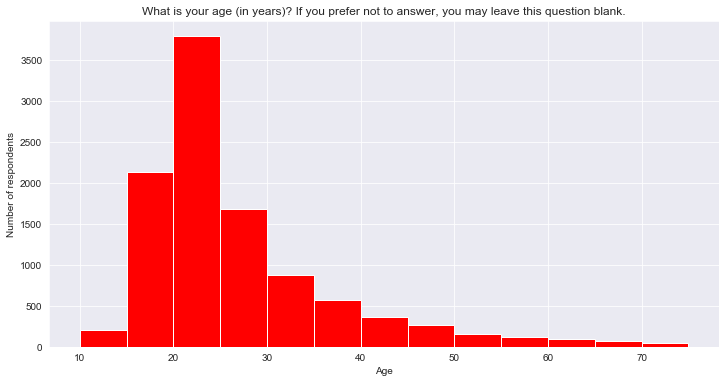

In [66]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_copy_df.Age,bins=np.arange(10,80,5),color='red')
plt.show()

It appears that a large percentage of respondents are in the age range of 20-45, which is somewhat representative of the programming community in general, as a lot of young people have taken up computer as their field of study or profession in the last 20 years.

# Gender

Let's look at the distribution of responses for the Gender. It's a well known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [68]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [73]:
gender_counts=survey_copy_df.Gender.value_counts()

In [74]:
gender_counts

Man                                                            11586
Woman                                                           1123
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

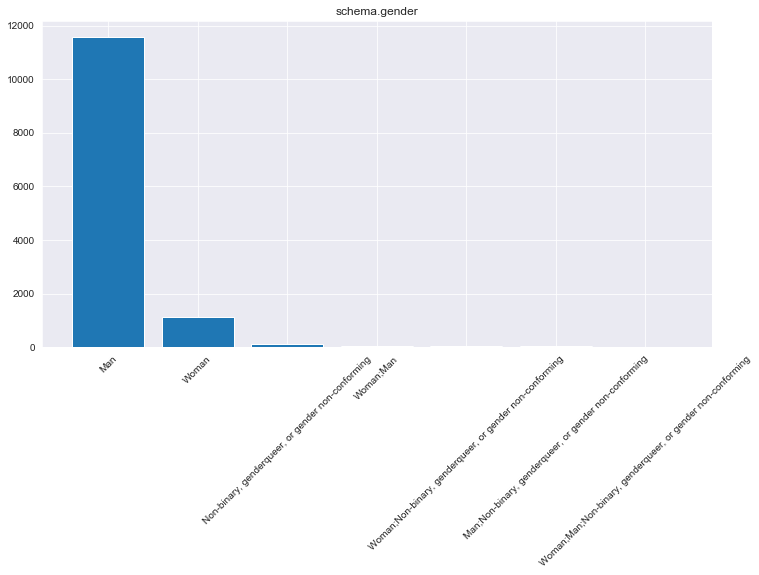

In [79]:
plt.figure(figsize=(12,6))
plt.title('schema.gender')
plt.bar(gender_counts.index,gender_counts)
plt.xticks(rotation=45)

# Education Level

Formal education in computer science is often considered an important requirement of becoming a programmer. Let's see if this indeed the case, especially since there are many free resources & tutorials available online to learn programming. We'll use a horizontal bar plot to compare education levels of respondents.

<Figure size 864x432 with 0 Axes>

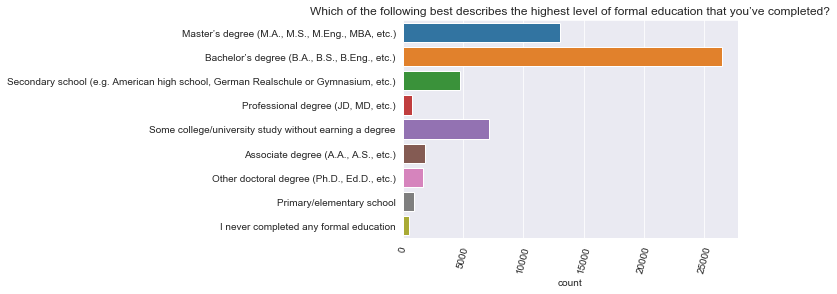

<Figure size 864x432 with 0 Axes>

In [80]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);
plt.figure(figsize=(12,6))

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers definitely seem to have some college education, although it's not clear from this graph alone if they hold a degree in computer science.

In [81]:
schema.Hobbyist 

'Do you code as a hobby?'

In [82]:
survey_copy_df.Hobbyist 

1         No
2        Yes
4        Yes
5         No
6        Yes
        ... 
64456    Yes
64457    Yes
64458    Yes
64459    Yes
64460    Yes
Name: Hobbyist, Length: 23457, dtype: object

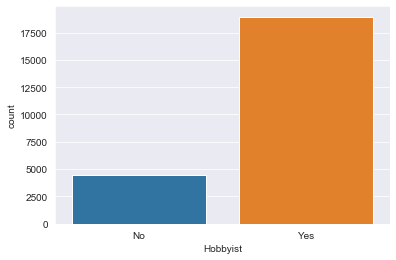

In [85]:
sns.countplot(survey_copy_df['Hobbyist'])

# Employment

Freelancing or contract work is a common choice among programmer, so it would be interesting to compare the breakdown between full time, part time & freelance work. Let's visualize the data from Employment column.

In [86]:
schema.Employment

'Which of the following best describes your current employment status?'

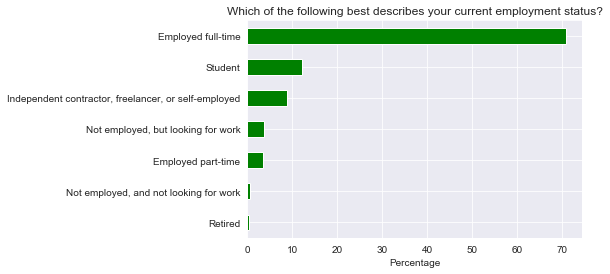

In [87]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

# Asking and Answering Questions

We've already gained several insights about the respondents and the programming community in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

Q: Which were the most popular programming languages in 2020?

To answer, this we can use the LanguageWorkedWith column. Similar to DevType respondents were allowed to choose multiple options here.

In [88]:
survey_copy_df.LanguageWorkedWith 

1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
4                                        HTML/CSS;Ruby;SQL
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 23457, dtype: object

In [93]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

We had to define a function split_multicolumn to find the relevent answers for the questions asked

In [95]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [96]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [97]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.890476
HTML/CSS                 55.802733
SQL                      48.455655
Python                   38.984813
Java                     35.621539
Bash/Shell/PowerShell    29.237834
C#                       27.812165
PHP                      23.141124
TypeScript               22.477157
C++                      21.111990
C                        19.233335
Go                        7.756628
Kotlin                    6.886334
Ruby                      6.225470
Assembly                  5.452910
VBA                       5.398613
Swift                     5.226416
R                         5.066629
Rust                      4.492639
Objective-C               3.605281
Dart                      3.518406
Scala                     3.155396
Perl                      2.759808
Haskell                   1.861591
Julia                     0.784971
dtype: float64

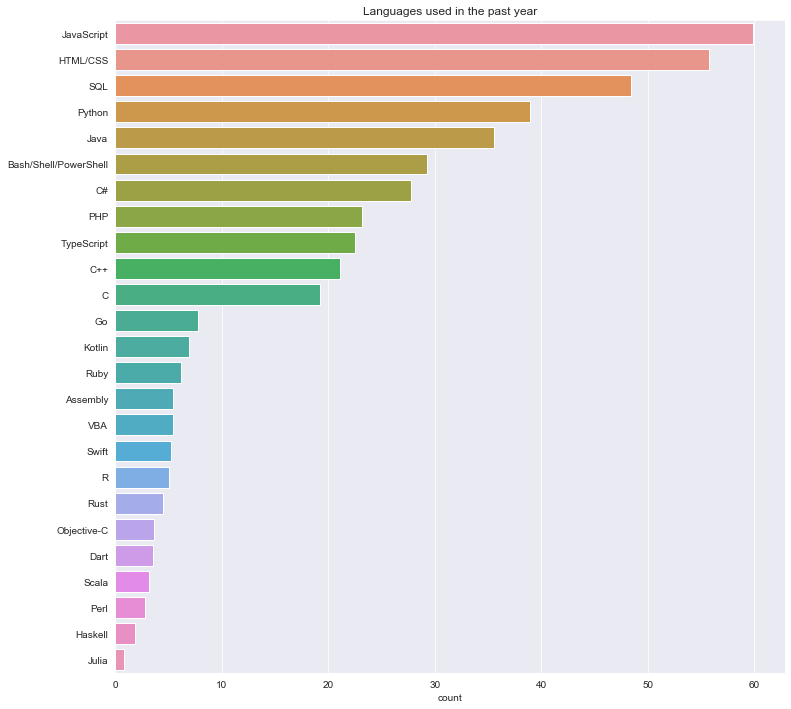

In [98]:
plt.figure(figsize=(12, 12))
sns.barplot(languages_worked_percentages, languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps not surprisingly, Javascript & HTML/CSS comes out at the top as web development is one of the most sought skills today and it's also happens to be one of the easiest to get started with. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL on a regular basis. For other forms of development, Python seems be the popular choice, beating out Java, which was the industry standard for server & application development for over 2 decades.

Q: Which languages are the most people interested to learn over the next year?

For this we can can use the LanguageDesireNextYear column, with similar processing as the previous one.

In [99]:
survey_copy_df.LanguageDesireNextYear

1                                             Python;Swift
2                                 Objective-C;Python;Swift
4                                          Java;Ruby;Scala
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 23457, dtype: object

In [100]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.133398
JavaScript               40.412032
HTML/CSS                 32.039528
SQL                      30.795365
TypeScript               26.462512
C#                       21.073207
Java                     20.466639
Go                       19.438110
Bash/Shell/PowerShell    18.066738
Rust                     16.254790
C++                      15.016832
Kotlin                   14.770171
PHP                      10.949256
C                         9.365353
Swift                     8.696731
Dart                      7.309846
R                         6.568313
Ruby                      6.422488
Scala                     5.331906
Haskell                   4.591924
Assembly                  3.772824
Julia                     2.544174
Objective-C               2.340950
Perl                      1.762306
VBA                       1.613379
dtype: float64

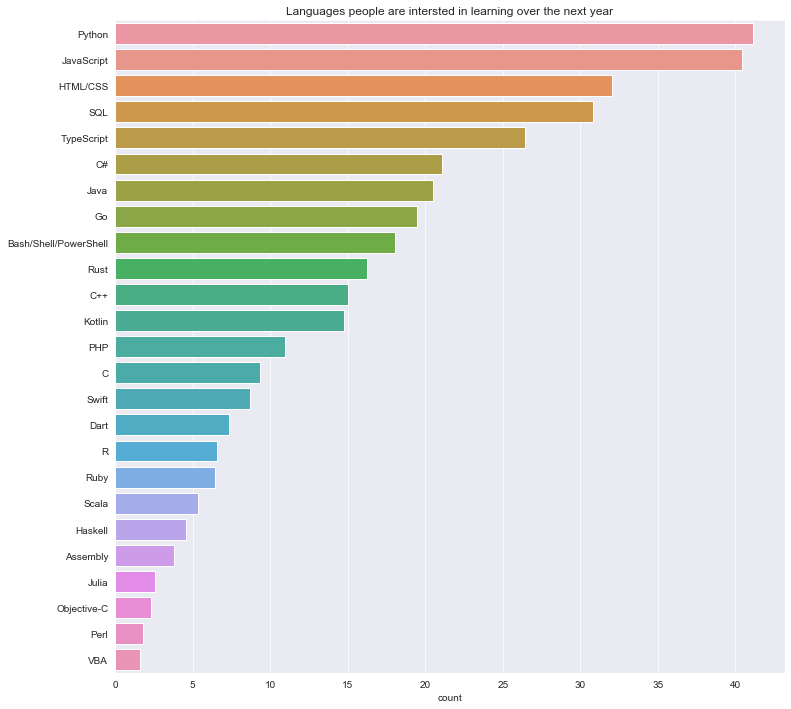

In [101]:
plt.figure(figsize=(12, 12))
sns.barplot(languages_interested_percentages, languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting etc. etc. We're using Python for this very analysis, so we're in good company!

# Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the groupby data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries which have more than 250 respondents.

In [102]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
countries_df

,WorkWeekHrs
Country,
Angola,72.333333
Kuwait,58.222222
Norway,55.451557
United Republic of Tanzania,55.384615
Finland,52.820577
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


Q: How important is it to start young to build a career in programming?


Let's create a scatter plot of Age vs. YearsCodePro (i.e. years of coding experience) to answer this question.

In [103]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

<Figure size 1080x648 with 0 Axes>

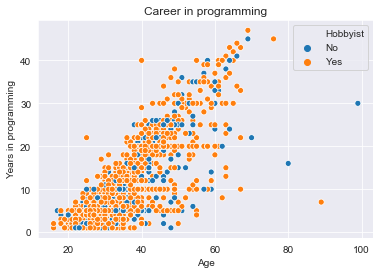

<Figure size 1080x648 with 0 Axes>

In [108]:
sns.scatterplot('Age','YearsCodePro',hue='Hobbyist',data=survey_copy_df)
plt.title('Career in programming')
plt.xlabel('Age')
plt.ylabel('Years in programming')
plt.figure(figsize=(15,9))

You can see points all over the graph, which seems to indicate that you can start programming professionally at any age. Also, many people who have been coding for several decades professionally also seem to enjoy it has a hobby.

In [109]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

<Figure size 864x432 with 0 Axes>

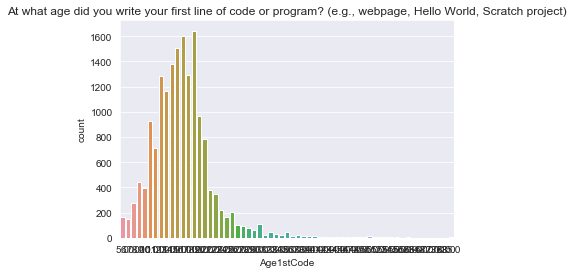

<Figure size 864x432 with 0 Axes>

In [115]:
plt.title(schema.Age1stCode)
sns.countplot(survey_copy_df.Age1stCode);
plt.figure(figsize=(12,6))
